In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#data_file_path = '../input/heart-disease-uci/heart.csv'
data_df = pd.read_csv('heart.csv')
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

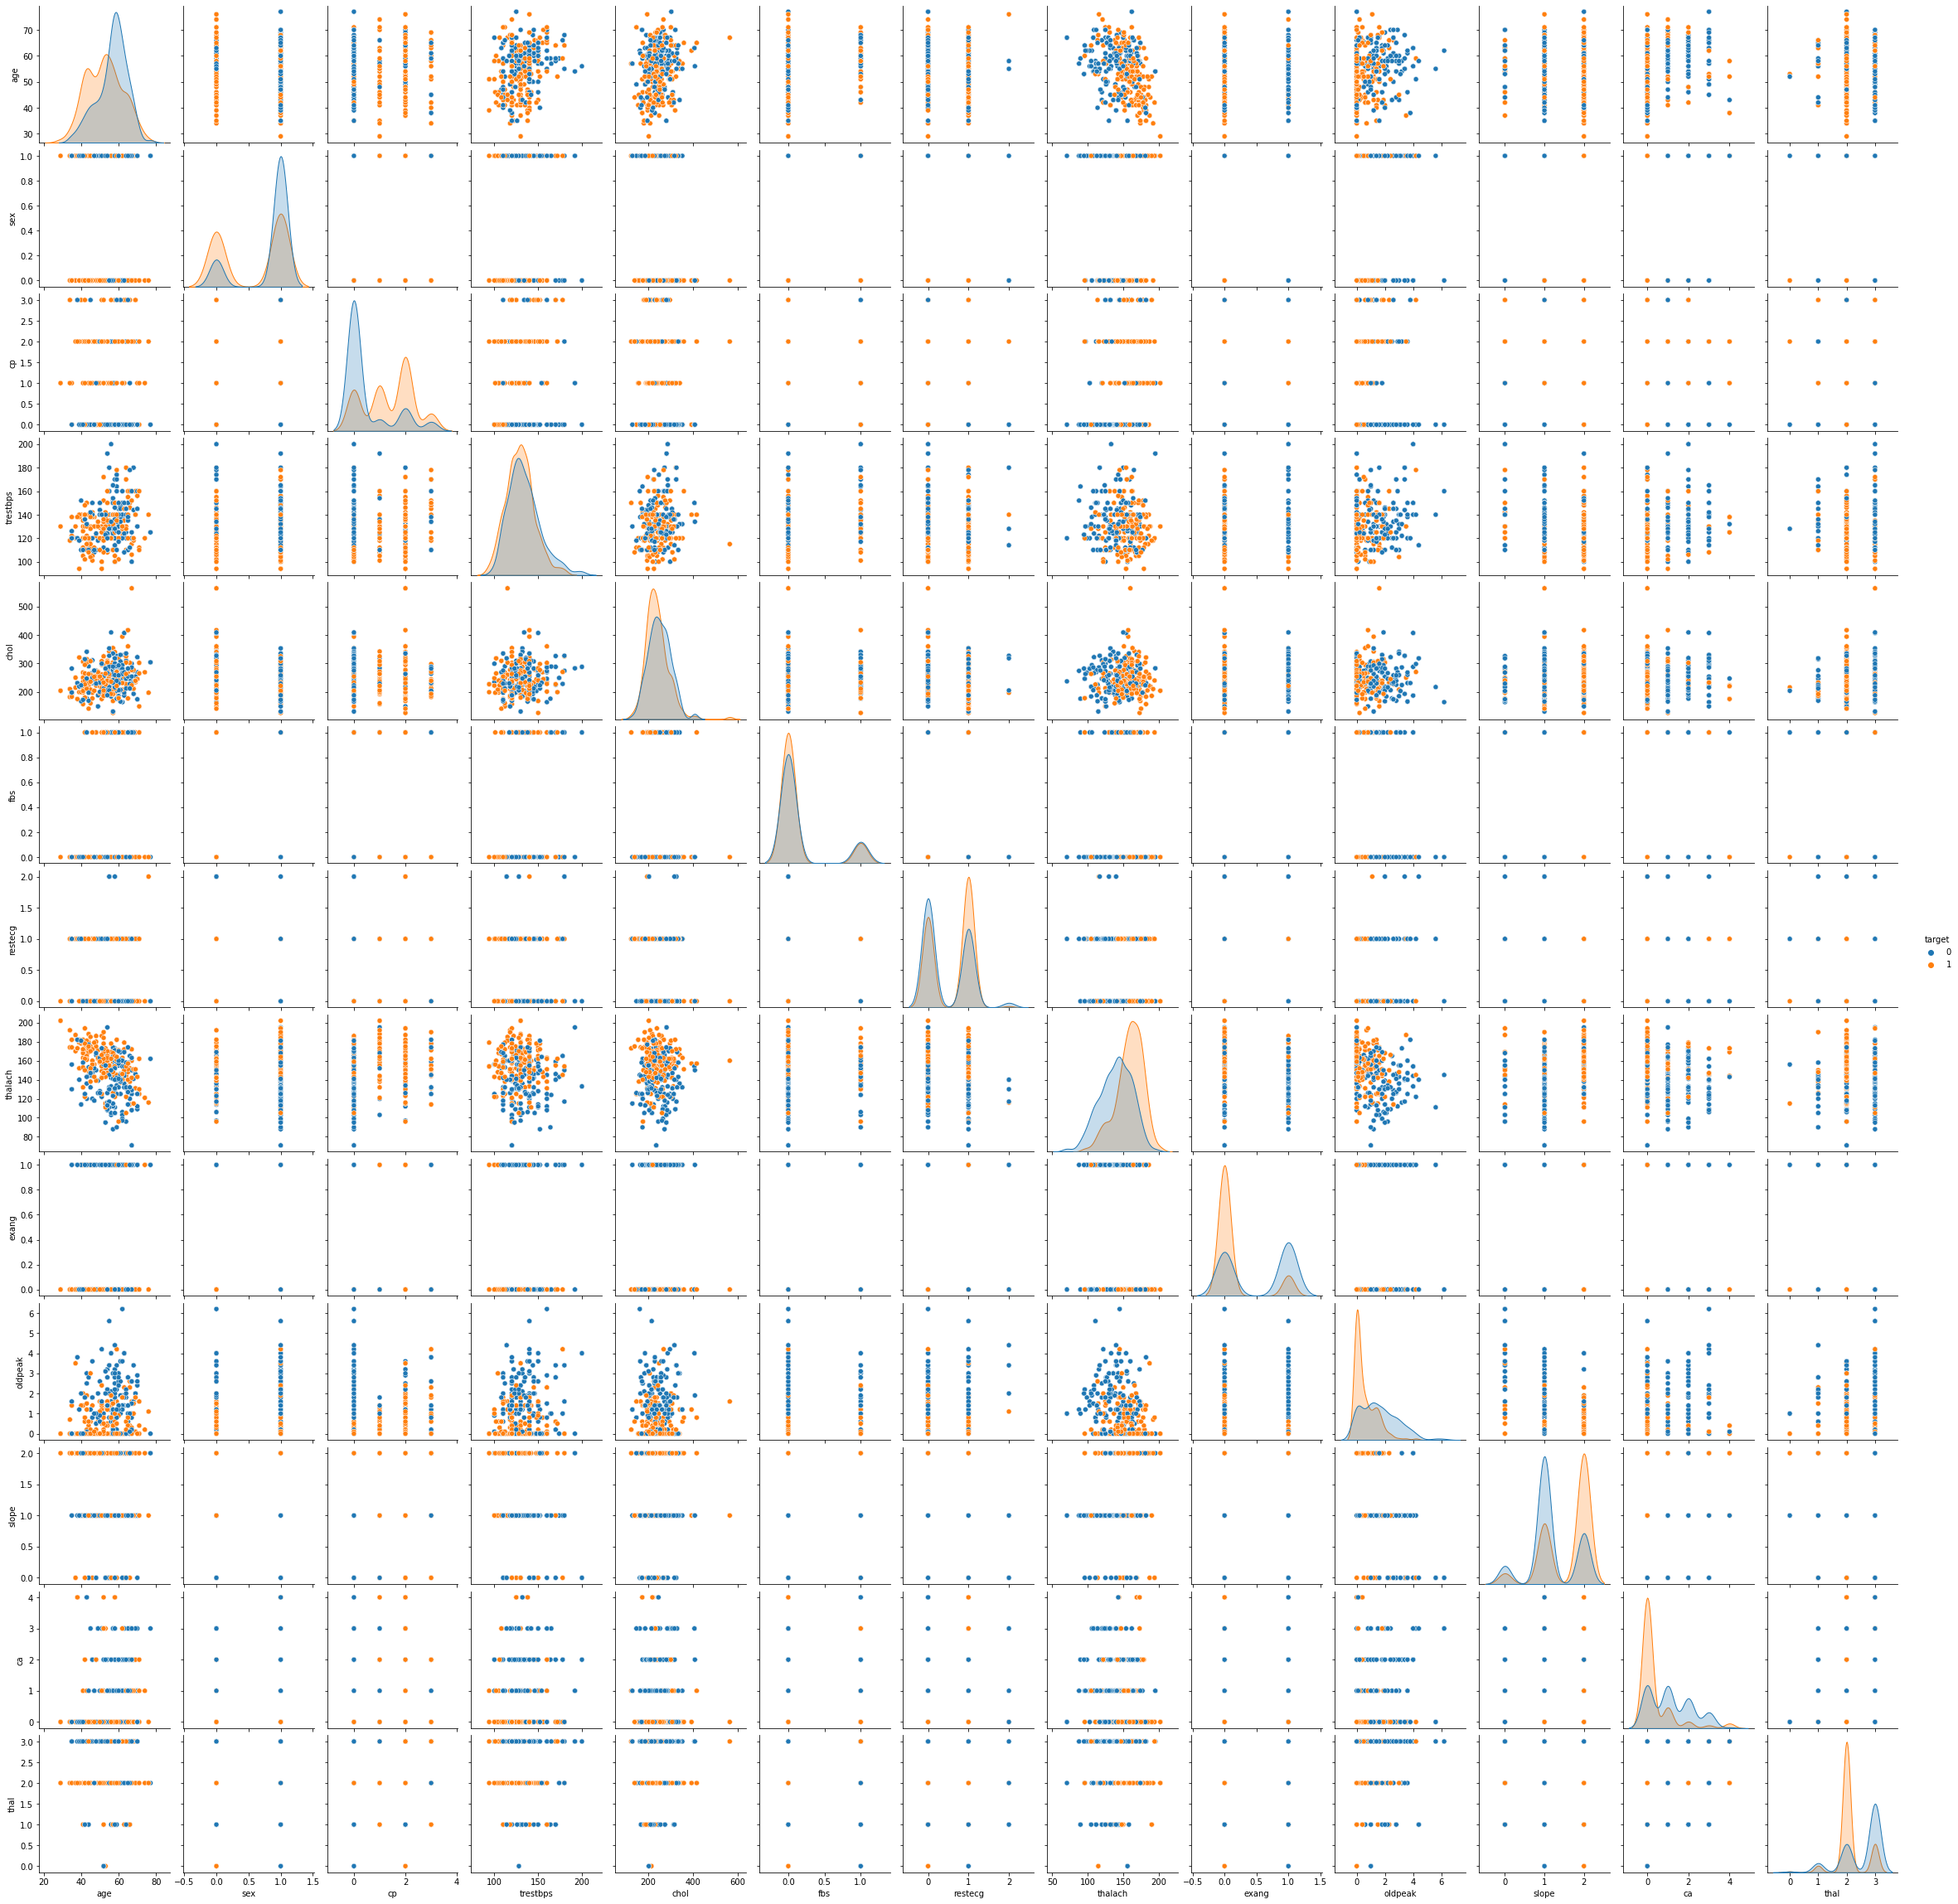

In [5]:
import seaborn as sns

sns.pairplot(data_df,hue='target')

Above data distribution clearly suggest that there is some categorical data present,
we can confirm it by taking couple of columns and plotting them against of number of patients.

C:\Users\omkar\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


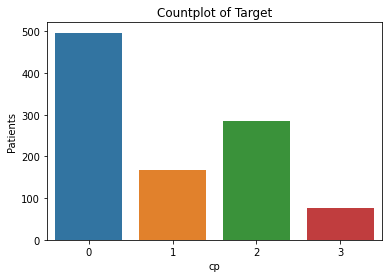

C:\Users\omkar\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


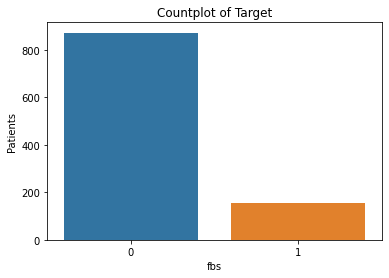

In [8]:
sns.countplot(data_df['cp'])
# Add labels
plt.title('Countplot of Target')
plt.xlabel('cp')
plt.ylabel('Patients')
plt.show()

sns.countplot(data_df['fbs'])
# Add labels
plt.title('Countplot of Target')
plt.xlabel('fbs')
plt.ylabel('Patients')
plt.show()

Above plots confirm that column cp and fbs are categorical.
We will proceed with converting data type to categorical

# Data type conversion 

In [11]:
data_df["sex"]=data_df["sex"].astype("category")
data_df["fbs"]=data_df["fbs"].astype("category")
data_df["restecg"]=data_df["restecg"].astype("category")
data_df["exang"]=data_df["exang"].astype("category")
data_df["slope"]=data_df["slope"].astype("category")
data_df["ca"]=data_df["ca"].astype("category")
data_df["thal"]=data_df["thal"].astype("category")
data_df["target"]=data_df["target"].astype("category")
data_df["cp"]=data_df["cp"].astype("category")

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   category
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   category
 12  thal      1025 non-null   category
 13  target    1025 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 50.5 KB


In [13]:
data_df.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [14]:
data_df.describe(include='category')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


In [15]:
correlation=data_df.corr()

<AxesSubplot:>

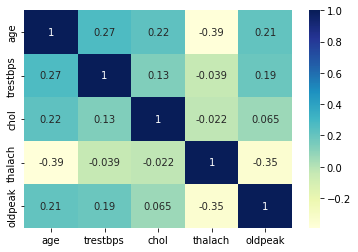

In [16]:
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

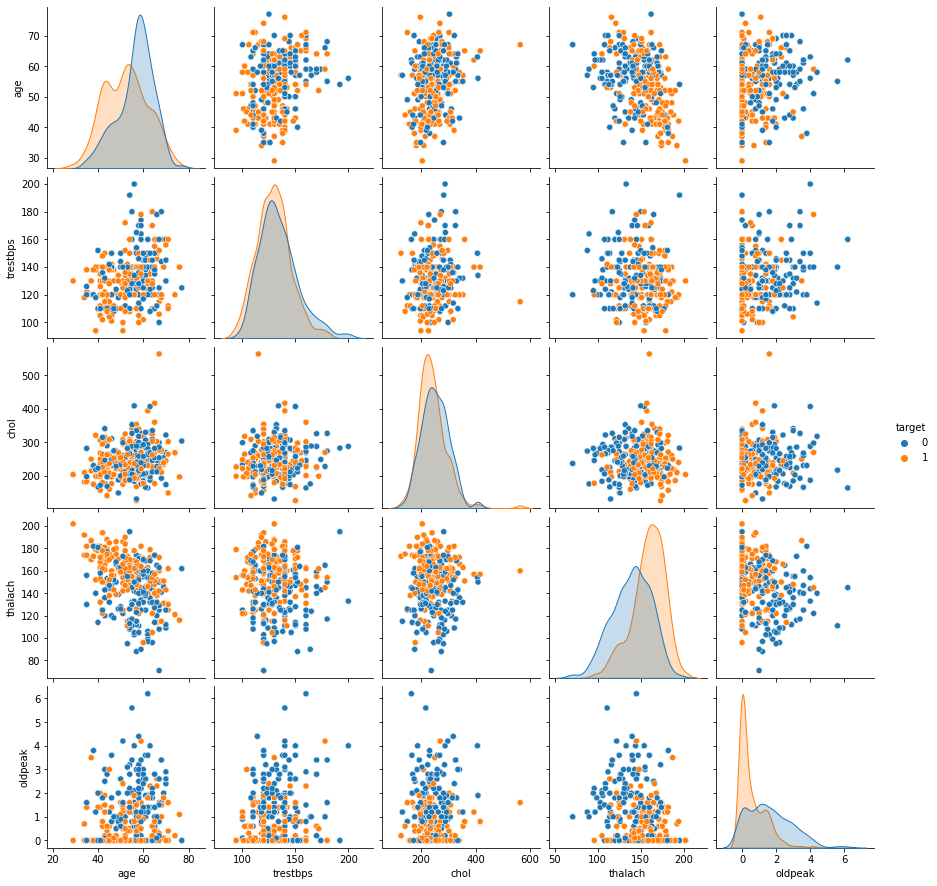

In [17]:
import seaborn as sns

sns.pairplot(data_df,hue='target')